In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(DESeq2)
library(magrittr)
library(SummarizedExperiment)
library(dplyr)
library(DESeq2)
library(plotly)
library(ggplot2)
library(viridis)
library(magrittr)
library(pheatmap)
library(DescTools)
library(pdfCluster)
library(RColorBrewer)
library(SummarizedExperiment)
library(caret)
library(class)
library(htmlwidgets)
set.seed(123) # maximum luck

start_time <- Sys.time()

IN_DIR <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/"
OUT_DIR <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/"

GTEx_DATA_DIR <- IN_DIR
GTEx_DATA_FIL <- "rse_tcdd_data.Rdata"

ensembl2rxns.df <- read.table(paste(IN_DIR,"Ensembl2ReactomeReactions.txt",sep=""),
                              sep="\t")

load(paste(GTEx_DATA_DIR,GTEx_DATA_FIL,sep=""))

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following object is masked from ‘package:utils’:

    findMatches

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges
Loading required package: GenomicRanges
Loading required package: GenomeInfoDb
Loading require

In [ ]:
%%R

variances <- apply(assay(final_result), 1, var)

zero_variance_rows <- which(variances == 0)

if (length(zero_variance_rows) > 0) {
    deleted_data <- assay(final_result)[zero_variance_rows, , drop = FALSE]
    new_assays <- assay(final_result)[-zero_variance_rows, , drop = FALSE]
    new_row_data <- rowData(final_result)[-zero_variance_rows, , drop = FALSE]

    new_final_result <- SummarizedExperiment(
        assays = SimpleList(counts = new_assays),
        rowData = new_row_data,
        colData = colData(final_result)
    )
    
    final_result <- new_final_result
    
    print(dim(assay(final_result)))
    print(dim(rowData(final_result)))
} else {
    cat("No rows with zero variance found.\n")
}

print(head(assay(final_result)))

[1] 43252   383
[1] 43252    11
                     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
ENSMUSG00000079800.2    0    0    0    0    0    0    0    0   49    49     0
ENSMUSG00000095092.1    0    0    0    0    0    0    0    0    0     0     0
ENSMUSG00000079192.2    0    0    0    0    0    0    0    0    0     0     0
ENSMUSG00000079794.2    0    0    0    0    0    0    0    0    0     0    50
ENSMUSG00000094799.1    0    0    0    0    0    0    0    0    0     0     0
ENSMUSG00000095250.1    0    0    0    0    0   50    0    0    0     0     0
                     [,12] [,13] [,14] [,15] [,16] [,17] [,18] [,19] [,20]
ENSMUSG00000079800.2    50     0    50    50     0     0     0     0     0
ENSMUSG00000095092.1     0     0     0     0     0     0     0     0     0
ENSMUSG00000079192.2     0     0     0     0     0     0     0     0     0
ENSMUSG00000079794.2     0     0     0     0     0     0     0     0     0
ENSMUSG00000094799.1     0     0     0     0   

ENSMUSG00000095092.1      0      0      0      0      0      0      0      0
ENSMUSG00000079192.2      0      0      0      0      0      0      0      0
ENSMUSG00000079794.2      0      0      0      0      0      0      0      0
ENSMUSG00000094799.1      0      0      0      0      0      0      0      0
ENSMUSG00000095250.1      0      0      0     50     48      0      0      0
                     [,142] [,143] [,144] [,145] [,146] [,147] [,148] [,149]
ENSMUSG00000079800.2      0      0      0      0      0      0      0      0
ENSMUSG00000095092.1      0      0      0      0      0      0      0      0
ENSMUSG00000079192.2      0      0      0      0      0      0      0      0
ENSMUSG00000079794.2      0      0      0      0      0      0      0      0
ENSMUSG00000094799.1      0      0      0      0      0      0      0      0
ENSMUSG00000095250.1      0      0      0      0      0      0      0      0
                     [,150] [,151] [,152] [,153] [,154] [,155] [,156] [,157]

ENSMUSG00000079192.2      0      0      0      0      0      0      0      0
ENSMUSG00000079794.2      0      0      0      0      0      0      0      0
ENSMUSG00000094799.1      0      0      0      0      0      0      0      0
ENSMUSG00000095250.1      0      0      0      0      0      0      0      0
                     [,262] [,263] [,264] [,265] [,266] [,267] [,268] [,269]
ENSMUSG00000079800.2      0      0      0      0      0    100    150     50
ENSMUSG00000095092.1      0      0      0      0      0      0      0      0
ENSMUSG00000079192.2      0      0      0      0      0      0      0      0
ENSMUSG00000079794.2      0      0      0      0      0      0      0      0
ENSMUSG00000094799.1      0      0      0      0      0      0      0      0
ENSMUSG00000095250.1      0      0      0      0      0      0      0      0
                     [,270] [,271] [,272] [,273] [,274] [,275] [,276] [,277]
ENSMUSG00000079800.2      0      0     50      0     50     40     34     49

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%%R
library(tibble)

keep_samples <- colData(final_result)$dose %in% c(0.00, 30.00)

final_result <- final_result[, keep_samples]

temp_df <- as_tibble(colData(final_result)) %>%
  filter(!grepl("SRP131784", study))

tcdd_data <- temp_df
final_result <- final_result[, colData(final_result)$external_id %in% temp_df$external_id]

print(dim(final_result))
print(dim(tcdd_data))
print(tcdd_data$external_id)

[1] 43252   136
[1] 136 198
  [1] "SRR7817611" "SRR7817612" "SRR7817614" "SRR7817615" "SRR7817616"
  [6] "SRR7817617" "SRR7817618" "SRR7817619" "SRR7817620" "SRR7817621"
 [11] "SRR7817622" "SRR7817623" "SRR7817624" "SRR7817625" "SRR7817626"
 [16] "SRR7817627" "SRR7817628" "SRR7817629" "SRR7817630" "SRR7817631"
 [21] "SRR7817632" "SRR7817633" "SRR7817634" "SRR7817635" "SRR7817636"
 [26] "SRR7817637" "SRR7817638" "SRR7817639" "SRR7817640" "SRR7817641"
 [31] "SRR7817642" "SRR7817643" "SRR7817644" "SRR7817645" "SRR7817646"
 [36] "SRR7817647" "SRR7817648" "SRR7817649" "SRR7817650" "SRR7817651"
 [41] "SRR7817652" "SRR7817653" "SRR7817654" "SRR7817655" "SRR7817656"
 [46] "SRR7817657" "SRR7817658" "SRR7817659" "SRR7817660" "SRR7817661"
 [51] "SRR7817662" "SRR7817663" "SRR7817666" "SRR7817667" "SRR7817668"
 [56] "SRR7817669" "SRR7817670" "SRR7817671" "SRR7817672" "SRR7817673"
 [61] "SRR7817674" "SRR7817675" "SRR7817676" "SRR7817677" "SRR7817678"
 [66] "SRR7817679" "SRR7817680" "SRR7817681" "SRR

In [5]:
%%R
sampling_percentage <- 0.10

tcdd_data_dose0 <- filter(tcdd_data, dose == 0)
tcdd_data_dose30 <- filter(tcdd_data, dose == 30)

final_results_list <- list()

min_count <- min(nrow(tcdd_data_dose0), nrow(tcdd_data_dose30)) * sampling_percentage
min_count <- floor(min_count) 

split_size <- max(floor(min_count / 10), 1)

dose0_splits <- split(tcdd_data_dose0, rep(1:10, each = split_size, length.out = nrow(tcdd_data_dose0)))
dose30_splits <- split(tcdd_data_dose30, rep(1:10, each = split_size, length.out = nrow(tcdd_data_dose30)))

for (i in 1:10) {
  tcdd_data <- bind_rows(dose0_splits[[1]], dose30_splits[[1]])

  temp_final_result <- final_result[, colData(final_result)$external_id %in% tcdd_data$external_id]
  matched_indices <- match(tcdd_data$external_id, colData(temp_final_result)$external_id)
  temp_final_result <- temp_final_result[, matched_indices]

  final_results_list[[i]] <- temp_final_result

  print(paste("Iteration", i, "dimensions:"))
  print(dim(tcdd_data))
  print(dim(temp_final_result))
}


[1] "Iteration 1 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 2 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 3 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 4 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 5 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 6 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 7 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 8 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 9 dimensions:"
[1]  14 198
[1] 43252    14
[1] "Iteration 10 dimensions:"
[1]  14 198
[1] 43252    14


In [6]:
%%R
gtex_df <- read.csv("/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/node_features2.txt",sep="")

In [ ]:
%%R
index = 0
for(final_result in final_results_list){
    print(paste("-----------------------round=", index, "---------------------",sep=""))
    tcdd_data <- colData(final_result)
    dose_counts <- table(tcdd_data$dose)
    dose_counts_df <- as.data.frame(dose_counts)
    colnames(dose_counts_df) <- c("Dose", "Count")
    combined_gender <- ifelse(tcdd_data$Sex != "", tcdd_data$Sex, tcdd_data$gender)
    write.table(tcdd_data$project_id,file=paste(OUT_DIR,"tcdd_project_id030_time_cross_10", index, ".txt",sep=""), row.names = FALSE, col.names = FALSE, sep = "\t")
    write.table(combined_gender,file=paste(OUT_DIR,"tcdd_gender030_time_cross_10",index,".txt",sep=""), row.names = FALSE, col.names = FALSE, sep = "\t")
    write.table(tcdd_data$external_id,file=paste(OUT_DIR,"tcdd_sample_id030_time_cross_10",index,".txt",sep=""), row.names = FALSE, col.names = FALSE, sep = "\t")
    write.table(tcdd_data$dose,file=paste(OUT_DIR,"tcdd_dose030_time_cross_10",index,".txt",sep=""), row.names = FALSE, col.names = FALSE, sep = "\t")
    tcdd.df <- final_result %>% SummarizedExperiment::assay() %>% as.data.frame()
    colnames(tcdd.df) <- colData(final_result)$external_id
    ensembl_wo_ids <- gsub("\\.[0-9]+","",rownames(tcdd.df))
    deleted_ensembl_wo_ids <- gsub("\\.[0-9]+","",rownames(deleted_data))
    rownames(tcdd.df) <- ensembl_wo_ids
    rownames(deleted_data) <- deleted_ensembl_wo_ids
    reactome_ensembl_ids <- intersect(ensembl2rxns.df$V1,ensembl_wo_ids)
    tcdd.df <- tcdd.df[reactome_ensembl_ids,]

    tcdd.dose.detail.vec <- tcdd_data$dose
    tcdd_dose_detail.vec <- tcdd_data$dose
    scale.factor <- (.Machine$integer.max - 1) / max(tcdd.df)
    tcdd.df <- round(tcdd.df * scale.factor)
    tcdd.df <- tcdd.df + 1
    dds <- DESeq2::DESeqDataSetFromMatrix(countData = as.matrix(tcdd.df),
                                      colData = data.frame(Sample=colnames(tcdd.df),
                                                           Dose=tcdd.dose.detail.vec),
                                      design = ~ Dose)
    vst.counts <- DESeq2::vst(dds,
                          blind = FALSE,
                          fitType = "local")
    ensembl2rxns.df <- read.table(paste(IN_DIR,"Ensembl2ReactomeReactions.txt",sep=""),
                              sep="\t")
    rxn2ensembls.nls <- list()
    rxns_w_tcdd_ensembls.df <- ensembl2rxns.df %>% dplyr::filter(V1 %in% reactome_ensembl_ids)
    rxns_w_tcdd_ensembls.df$V1 <- as.character(rxns_w_tcdd_ensembls.df$V1)
    rxns_w_tcdd_ensembls.df$V2 <- as.character(rxns_w_tcdd_ensembls.df$V2)


    for(i in 1:nrow(rxns_w_tcdd_ensembls.df)){
      ens_id <- rxns_w_tcdd_ensembls.df$V1[i]
      rxn_id <- rxns_w_tcdd_ensembls.df$V2[i]
    #     print(names(rxn2ensembls.nls))

      ensembl_list_for_rxn_id <- rxn2ensembls.nls[[rxn_id]]
      if(is.null(ensembl_list_for_rxn_id)){
    #     print("null")
        ensembl_list_for_rxn_id <- c(ens_id)
      }
      rxn2ensembls.nls[[rxn_id]] <- c(ensembl_list_for_rxn_id,ens_id) %>% unique()
    }
    
    N_FOLDS <- 10
    sample <- colData(vst.counts)
    vst.count.mtx <-
    vst.counts %>% SummarizedExperiment::assay() %>% as.data.frame()
    rxns <- rxn2ensembls.nls %>% names()
    rxn_knn_misclass_rate.nls <- list()
    rxn_knn_ari.nls <- list()
    rxn_knn_ecount.nls <- list()
    rxn_pca.nls <- list()
    count <- 0
    toi_indices <- seq(1,length(tcdd_dose_detail.vec))
    tcdd_dose_detail_vec_tis_of_interest <-
    tcdd_dose_detail.vec[toi_indices]
    vst.count.mtx.tis_of_interest <- vst.count.mtx[, toi_indices]
    training_indices <-
       caret::createDataPartition(
          tcdd_dose_detail_vec_tis_of_interest,
          times = 1,
          p = 1.0, # no data will be held out when set to "1.0"
          list = FALSE
       )
    vst.count.mtx.train <-
    vst.count.mtx.tis_of_interest[, training_indices] #9/10ths of data
    vst.count.mtx.test  <-
    vst.count.mtx.tis_of_interest[, -training_indices] #1/10th of data
    tcdd_dose_detail.vec.train <- tcdd_dose_detail_vec_tis_of_interest[training_indices]
    tcdd_dose_detail.vec.test <- tcdd_dose_detail_vec_tis_of_interest[-training_indices]
    cv_fold_indices <- caret::createFolds(tcdd_dose_detail.vec.train,
                                      k = N_FOLDS)
    binary_tcdd_dose_annotations <- unique(tcdd_dose_detail.vec)
    full_rxn_pca_results.nls <- list()
    rxn_id_2_result_file_idx.nls <- list()

    n_rxns <- length(rxns)
    print(n_rxns)
    result_idx <- 1
    for(rxn_id_idx in seq(1:n_rxns)){
       rxn_id <- rxns[rxn_id_idx]
       rxn_pca <-
          prcomp(t(vst.count.mtx.train[rxn2ensembls.nls[[rxn_id]], ]), scale. = T)
       full_rxn_pca_results.nls[[rxn_id]] <- rxn_pca
       rxn_id_2_result_file_idx.nls[[rxn_id]] <- result_idx
       rxn_pca.nls[[rxn_id]] <-
          rxn_pca$x[, 1] # 1st principal component coordinate within this reaction-space for each sample
       if(mod(rxn_id_idx,100) == 0){
          print(paste("Processed ",rxn_id_idx,
                      " of ",n_rxns,
                      " reactions (",round((rxn_id_idx + 1)/n_rxns,digits = 3) * 100,"%)...",
                      sep=""))
          flush.console()
       }
       if(mod(rxn_id_idx,1000) == 0){
          print(paste("Storing PCA objects containing reactions ",rxn_id_idx-1000,
                      "-",rxn_id_idx,
                      " of ",n_rxns,
                      " reactions (",round((rxn_id_idx + 1)/n_rxns,digits = 3) * 100,"%)...",
                      sep=""))
          full_rxn_pca_results.nls <- list()
          gc()
          result_idx <- result_idx + 1
       }
    }
    saveRDS(rxn_pca.nls, paste(OUT_DIR, "rxn_pca_nls030_time_cross_10", index, ".Rds", sep = ""))
    
    X <- rxn_pca.nls
    Y <- tcdd_dose_detail.vec.train
    E <- read.table(paste(IN_DIR,"ReactionNetwork_Rel.txt",sep=""))
    rxn2nodeLabel.nls <- list()
    nodeLabel2rxn.nls <- list()
    for(i in 1:length(X)){
      rxn2nodeLabel.nls[[names(X)[i]]] <- i
      nodeLabel2rxn.nls[[i]] <- names(X)[i]
    }
    E <- E %>%
    dplyr::filter(V1 %in% names(rxn2nodeLabel.nls))
    E <- E %>%
    dplyr::filter(V3 %in% names(rxn2nodeLabel.nls))
    E <- E %>%
    dplyr::filter(V1 %in% names(rxn2nodeLabel.nls)) %>%
    dplyr::filter(V3 %in% names(rxn2nodeLabel.nls)) %>%
    dplyr::select(V1,V3)
    node1 <- numeric()
    node2 <- numeric()
    for(i in 1:nrow(E)){
      node1 <- c(node1,rxn2nodeLabel.nls[[as.character(E$V1[i])]])
      node2 <- c(node2,rxn2nodeLabel.nls[[as.character(E$V3[i])]])
    }
    z <- unlist(rxn2nodeLabel.nls)
    y <- unlist(nodeLabel2rxn.nls)
    E <- data.frame(node1 = node1,
                node2 = node2)
    X <- as.data.frame(X)
    Y <- as.data.frame(Y)
    missing_in_gtex <- setdiff(names(gtex_df), names(X))
    missing_pathway <- data.frame(missing_pathway = missing_in_gtex)
    all_values <- as.vector(as.matrix(X))
    median_value <- median(all_values, na.rm = TRUE)
    for (col in missing_pathway$missing_pathway) {
      X[[col]] <- median_value
    }

    write.table(X,
          file=paste(IN_DIR,"node_features030_2_time_cross_10", index, ".txt",sep=""),
          row.names = FALSE,
          col.names = FALSE)
    write.table(Y,
              file=paste(IN_DIR,"graph_targets030_time_cross_10", index, ".txt",sep=""),
              row.names = FALSE,
              col.names = FALSE)
    index <- index + 1
}
print("finished")

[1] "-----------------------round=0---------------------"
[1] 9825
[1] "Processed 100 of 9825 reactions (1%)..."
[1] "Processed 200 of 9825 reactions (2%)..."
[1] "Processed 300 of 9825 reactions (3.1%)..."
[1] "Processed 400 of 9825 reactions (4.1%)..."
[1] "Processed 500 of 9825 reactions (5.1%)..."
[1] "Processed 600 of 9825 reactions (6.1%)..."
[1] "Processed 700 of 9825 reactions (7.1%)..."
[1] "Processed 800 of 9825 reactions (8.2%)..."
[1] "Processed 900 of 9825 reactions (9.2%)..."
[1] "Processed 1000 of 9825 reactions (10.2%)..."
[1] "Storing PCA objects containing reactions 0-1000 of 9825 reactions (10.2%)..."
[1] "Processed 1100 of 9825 reactions (11.2%)..."
[1] "Processed 1200 of 9825 reactions (12.2%)..."
[1] "Processed 1300 of 9825 reactions (13.2%)..."
[1] "Processed 1400 of 9825 reactions (14.3%)..."
[1] "Processed 1500 of 9825 reactions (15.3%)..."
[1] "Processed 1600 of 9825 reactions (16.3%)..."
[1] "Processed 1700 of 9825 reactions (17.3%)..."
[1] "Processed 1800 of

[1] "Processed 4300 of 9825 reactions (43.8%)..."
[1] "Processed 4400 of 9825 reactions (44.8%)..."
[1] "Processed 4500 of 9825 reactions (45.8%)..."
[1] "Processed 4600 of 9825 reactions (46.8%)..."
[1] "Processed 4700 of 9825 reactions (47.8%)..."
[1] "Processed 4800 of 9825 reactions (48.9%)..."
[1] "Processed 4900 of 9825 reactions (49.9%)..."
[1] "Processed 5000 of 9825 reactions (50.9%)..."
[1] "Storing PCA objects containing reactions 4000-5000 of 9825 reactions (50.9%)..."
[1] "Processed 5100 of 9825 reactions (51.9%)..."
[1] "Processed 5200 of 9825 reactions (52.9%)..."
[1] "Processed 5300 of 9825 reactions (54%)..."
[1] "Processed 5400 of 9825 reactions (55%)..."
[1] "Processed 5500 of 9825 reactions (56%)..."
[1] "Processed 5600 of 9825 reactions (57%)..."
[1] "Processed 5700 of 9825 reactions (58%)..."
[1] "Processed 5800 of 9825 reactions (59%)..."
[1] "Processed 5900 of 9825 reactions (60.1%)..."
[1] "Processed 6000 of 9825 reactions (61.1%)..."
[1] "Storing PCA objects c

[1] "Processed 8600 of 9825 reactions (87.5%)..."
[1] "Processed 8700 of 9825 reactions (88.6%)..."
[1] "Processed 8800 of 9825 reactions (89.6%)..."
[1] "Processed 8900 of 9825 reactions (90.6%)..."
[1] "Processed 9000 of 9825 reactions (91.6%)..."
[1] "Storing PCA objects containing reactions 8000-9000 of 9825 reactions (91.6%)..."
[1] "Processed 9100 of 9825 reactions (92.6%)..."
[1] "Processed 9200 of 9825 reactions (93.6%)..."
[1] "Processed 9300 of 9825 reactions (94.7%)..."
[1] "Processed 9400 of 9825 reactions (95.7%)..."
[1] "Processed 9500 of 9825 reactions (96.7%)..."
[1] "Processed 9600 of 9825 reactions (97.7%)..."
[1] "Processed 9700 of 9825 reactions (98.7%)..."
[1] "Processed 9800 of 9825 reactions (99.8%)..."
[1] "-----------------------round=3---------------------"
[1] 9825
[1] "Processed 100 of 9825 reactions (1%)..."
[1] "Processed 200 of 9825 reactions (2%)..."
[1] "Processed 300 of 9825 reactions (3.1%)..."
[1] "Processed 400 of 9825 reactions (4.1%)..."
[1] "Proc

[1] "Storing PCA objects containing reactions 2000-3000 of 9825 reactions (30.5%)..."
[1] "Processed 3100 of 9825 reactions (31.6%)..."
[1] "Processed 3200 of 9825 reactions (32.6%)..."
[1] "Processed 3300 of 9825 reactions (33.6%)..."
[1] "Processed 3400 of 9825 reactions (34.6%)..."
[1] "Processed 3500 of 9825 reactions (35.6%)..."
[1] "Processed 3600 of 9825 reactions (36.7%)..."
[1] "Processed 3700 of 9825 reactions (37.7%)..."
[1] "Processed 3800 of 9825 reactions (38.7%)..."
[1] "Processed 3900 of 9825 reactions (39.7%)..."
[1] "Processed 4000 of 9825 reactions (40.7%)..."
[1] "Storing PCA objects containing reactions 3000-4000 of 9825 reactions (40.7%)..."
[1] "Processed 4100 of 9825 reactions (41.7%)..."
[1] "Processed 4200 of 9825 reactions (42.8%)..."
[1] "Processed 4300 of 9825 reactions (43.8%)..."
[1] "Processed 4400 of 9825 reactions (44.8%)..."
[1] "Processed 4500 of 9825 reactions (45.8%)..."
[1] "Processed 4600 of 9825 reactions (46.8%)..."
[1] "Processed 4700 of 9825 

[1] "Processed 7200 of 9825 reactions (73.3%)..."
[1] "Processed 7300 of 9825 reactions (74.3%)..."
[1] "Processed 7400 of 9825 reactions (75.3%)..."
[1] "Processed 7500 of 9825 reactions (76.3%)..."
[1] "Processed 7600 of 9825 reactions (77.4%)..."
[1] "Processed 7700 of 9825 reactions (78.4%)..."
[1] "Processed 7800 of 9825 reactions (79.4%)..."
[1] "Processed 7900 of 9825 reactions (80.4%)..."
[1] "Processed 8000 of 9825 reactions (81.4%)..."
[1] "Storing PCA objects containing reactions 7000-8000 of 9825 reactions (81.4%)..."
[1] "Processed 8100 of 9825 reactions (82.5%)..."
[1] "Processed 8200 of 9825 reactions (83.5%)..."
[1] "Processed 8300 of 9825 reactions (84.5%)..."
[1] "Processed 8400 of 9825 reactions (85.5%)..."
[1] "Processed 8500 of 9825 reactions (86.5%)..."
[1] "Processed 8600 of 9825 reactions (87.5%)..."
[1] "Processed 8700 of 9825 reactions (88.6%)..."
[1] "Processed 8800 of 9825 reactions (89.6%)..."
[1] "Processed 8900 of 9825 reactions (90.6%)..."
[1] "Processed

[1] "Processed 1700 of 9825 reactions (17.3%)..."
[1] "Processed 1800 of 9825 reactions (18.3%)..."
[1] "Processed 1900 of 9825 reactions (19.3%)..."
[1] "Processed 2000 of 9825 reactions (20.4%)..."
[1] "Storing PCA objects containing reactions 1000-2000 of 9825 reactions (20.4%)..."
[1] "Processed 2100 of 9825 reactions (21.4%)..."
[1] "Processed 2200 of 9825 reactions (22.4%)..."
[1] "Processed 2300 of 9825 reactions (23.4%)..."
[1] "Processed 2400 of 9825 reactions (24.4%)..."
[1] "Processed 2500 of 9825 reactions (25.5%)..."
[1] "Processed 2600 of 9825 reactions (26.5%)..."
[1] "Processed 2700 of 9825 reactions (27.5%)..."
[1] "Processed 2800 of 9825 reactions (28.5%)..."
[1] "Processed 2900 of 9825 reactions (29.5%)..."
[1] "Processed 3000 of 9825 reactions (30.5%)..."
[1] "Storing PCA objects containing reactions 2000-3000 of 9825 reactions (30.5%)..."
[1] "Processed 3100 of 9825 reactions (31.6%)..."
[1] "Processed 3200 of 9825 reactions (32.6%)..."
[1] "Processed 3300 of 9825 

[1] "Processed 6000 of 9825 reactions (61.1%)..."
[1] "Storing PCA objects containing reactions 5000-6000 of 9825 reactions (61.1%)..."
[1] "Processed 6100 of 9825 reactions (62.1%)..."
[1] "Processed 6200 of 9825 reactions (63.1%)..."
[1] "Processed 6300 of 9825 reactions (64.1%)..."
[1] "Processed 6400 of 9825 reactions (65.2%)..."
[1] "Processed 6500 of 9825 reactions (66.2%)..."
[1] "Processed 6600 of 9825 reactions (67.2%)..."
[1] "Processed 6700 of 9825 reactions (68.2%)..."
[1] "Processed 6800 of 9825 reactions (69.2%)..."
[1] "Processed 6900 of 9825 reactions (70.2%)..."
[1] "Processed 7000 of 9825 reactions (71.3%)..."
[1] "Storing PCA objects containing reactions 6000-7000 of 9825 reactions (71.3%)..."
[1] "Processed 7100 of 9825 reactions (72.3%)..."
[1] "Processed 7200 of 9825 reactions (73.3%)..."
[1] "Processed 7300 of 9825 reactions (74.3%)..."
[1] "Processed 7400 of 9825 reactions (75.3%)..."
[1] "Processed 7500 of 9825 reactions (76.3%)..."
[1] "Processed 7600 of 9825 

converting counts to integer mode
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function
  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.
converting counts to integer mode
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function
  the design formula contains one or more numeric varia

In [8]:
import os.path as op
import random
import time
import numpy as np

import matplotlib.pyplot as plt
import numpy
import sklearn
import torch
import torch.nn.functional as nn_func
from sklearn import preprocessing
from sklearn.metrics import adjusted_rand_score
from torch.nn import Linear
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GraphConv, global_mean_pool

INPUT_CHANNELS = 1
OUTPUT_CHANNELS = 26
NEW_CHANNELS = 2
HIDDEN_CHANNELS = 64
BATCH_SIZE = 64
BENCHMARKING = False
EPOCHS = 500

random.seed(88888888)
np.random.seed(88888888)
torch.manual_seed(88888888)

In [ ]:
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()

        self.conv1 = GraphConv(INPUT_CHANNELS, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.conv3 = GraphConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, OUTPUT_CHANNELS)

    def forward(self, x, edge_index, batch, edge_weight=None):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_weight)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = self.lin(x)

        return x


def read_reactome_graph(e_fn):
    e_v1 = []
    e_v2 = []

    for line in open(e_fn, 'r'):
        dt = line.split()
        node1 = int(dt[0]) - 1  # subtracting to convert R idx to python idx
        node2 = int(dt[1]) - 1  # " "
        e_v1.append(node1)
        e_v2.append(node2)

    return e_v1, e_v2


def build_reactome_graph_datalist(e_v1, e_v2, n_fn, g_fn, pid_fn, sid_fn, gen_fn, dose_fn):
    edge_index = torch.tensor([e_v1, e_v2], dtype=torch.long)
    feature_v = numpy.loadtxt(n_fn)
    target_v = numpy.loadtxt(g_fn, dtype=float, delimiter=",")
    projectID_v = numpy.loadtxt(pid_fn, dtype=str, delimiter="\t")
    sampleID_v = numpy.loadtxt(sid_fn, dtype=str, delimiter="\t")
    gender_v = numpy.loadtxt(gen_fn, dtype=str, delimiter="\t")
    dose_v = numpy.loadtxt(dose_fn, dtype=str, delimiter="\t")
    
    binary_labels = (target_v > 0).astype(int)
    
    print("labels check:")
    for dose, label in zip(target_v[:10], binary_labels[:10]): 
        print(f"dose: {dose}, label: {label}")


    d_list = []
    for row_idx in range(len(feature_v)):
        features = feature_v[row_idx, :]
        x = torch.tensor(features, dtype=torch.float)
        x = x.unsqueeze(1)
#         y = torch.tensor([target_v[row_idx]])
        y = torch.tensor([binary_labels[row_idx]], dtype=torch.long)
        
        pid = projectID_v[row_idx]
        sid = sampleID_v[row_idx]
        gen = gender_v[row_idx]
        dose = dose_v[row_idx]
        
        d_list.append(Data(x=x, y=y, pid=pid, sid=sid, gen=gen, dose=dose, edge_index=edge_index))

    return d_list


def build_reactome_graph_loader(d_list, batch_size):
    loader = DataLoader(d_list, batch_size=batch_size, shuffle=False)  # True)

    return loader


def train(loader, dv):
    model.train()

    correct = 0
    for batch in loader:  # Iterate in batches over the training dataset.
        batch.validate()
        x = batch.x.to(dv)
        e = batch.edge_index.to(dv)
        b = batch.batch.to(dv)
        y = batch.y.to(dv)

        out = model(x, e, b)  # Perform a single forward pass.
        loss = criterion(out, y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


def test(loader, dv):
    model.eval()

    targets = []
    predictions = []
    project_ids = []
    sample_ids = []
    genders = []
    doses = []
    confidences = []
    for batch in loader:  # Iterate in batches over the test dataset.
        x = batch.x.to(dv)
        e = batch.edge_index.to(dv)
        b = batch.batch.to(dv)
        y = batch.y.to(dv)
        targets += torch.Tensor.tolist(y)
        
        project_ids += batch.pid
        sample_ids += batch.sid
        genders += batch.gen
        doses += batch.dose
        
        out = model(x, e, b)  # Perform a single forward pass.
        prob = torch.softmax(out, dim=1)
        
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        predictions += torch.Tensor.tolist(pred)
        confidences += torch.Tensor.tolist(prob)
        
    num_classes = len(confidences[0])

    data_to_save = []
    for i in range(len(targets)):
        row = [project_ids[i], sample_ids[i], genders[i], doses[i], targets[i], predictions[i]] + confidences[i]
        data_to_save.append(row)
    data_to_save = numpy.array(data_to_save)
    print(data_to_save)
    
    fmt = ['%s', '%s', '%s', '%s', '%s', '%s'] + ['%s' for _ in range(num_classes)]
    
    headers = ['project_ids', 'sample_ids', 'genders', 'doses', 'target', 'prediction'] + [f'confidence_class_{i}' for i in range(num_classes)]
    numpy.savetxt(output_fn, data_to_save, fmt='\t'.join(fmt), delimiter='\t', header='\t'.join(headers), comments='')
        
    ari = adjusted_rand_score(targets, predictions)
    print(f'ari: {ari}')
    return ari

In [10]:
for i in range(10):
    n_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/node_features030_2_time_cross_10{i}.txt'
    feature_v = numpy.loadtxt(n_fn)
    print(feature_v)
    print("--------------------------")

[[-1.6121586  -1.6121586  -1.6121586  ... -0.04571659 -0.04571659
  -0.04571659]
 [-2.72735478 -2.72735478 -2.72735478 ... -0.04571659 -0.04571659
  -0.04571659]
 [-3.96604581 -3.96604581 -3.96604581 ... -0.04571659 -0.04571659
  -0.04571659]
 ...
 [ 2.78897016  2.78897016  2.78897016 ... -0.04571659 -0.04571659
  -0.04571659]
 [-0.71811898 -0.71811898 -0.71811898 ... -0.04571659 -0.04571659
  -0.04571659]
 [ 1.18099407  1.18099407  1.18099407 ... -0.04571659 -0.04571659
  -0.04571659]]
--------------------------
[[-1.6121586  -1.6121586  -1.6121586  ... -0.04571659 -0.04571659
  -0.04571659]
 [-2.72735478 -2.72735478 -2.72735478 ... -0.04571659 -0.04571659
  -0.04571659]
 [-3.96604581 -3.96604581 -3.96604581 ... -0.04571659 -0.04571659
  -0.04571659]
 ...
 [ 2.78897016  2.78897016  2.78897016 ... -0.04571659 -0.04571659
  -0.04571659]
 [-0.71811898 -0.71811898 -0.71811898 ... -0.04571659 -0.04571659
  -0.04571659]
 [ 1.18099407  1.18099407  1.18099407 ... -0.04571659 -0.04571659
  -0.

In [11]:
for i in range(10):
    g_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/graph_targets030_time_cross_10{i}.txt'
    target_v = numpy.loadtxt(g_fn)
    print(target_v)
    print("----------------------------")

[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------
[ 0.  0.  0.  0.  0.  0.  0. 30. 30. 30. 30. 30. 30. 30.]
----------------------------


In [12]:
for i in range(10):
    node_features_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/node_features030_2_time_cross_10{i}.txt'
    graph_targets_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/graph_targets030_time_cross_10{i}.txt'
    edges_fn = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/edges.txt'
    model_fn = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/GNN/trained_pytorch_model_rewired10_fold_full_dataset.pt'
    output_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/predictions030_time_cross_10{i}.tsv'
    sample_id_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/tcdd_sample_id030_time_cross_10{i}.txt'
    project_id_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/tcdd_project_id030_time_cross_10{i}.txt'
    gender_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/tcdd_gender030_time_cross_10{i}.txt'
    dose_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/tcdd_dose030_time_cross_10{i}.txt'
    # test graph_targets.txt, node_features.txt and edges.txt
    features_exist = op.exists(node_features_fn)
    targets_exist = op.exists(graph_targets_fn)
    edges_exist = op.exists(edges_fn)
    model_exists = op.exists(model_fn)

    def change_key(self, old, new):
        for _ in range(len(self)):
            k, v = self.popitem(False)
            self[new if old == k else k] = v

    (edge_v1, edge_v2) = read_reactome_graph(edges_fn)
    model = GNN(hidden_channels=HIDDEN_CHANNELS)
    device = cpu = torch.device('cpu')

    sd = torch.load(model_fn, map_location=device)
    change_key(sd, 'conv1.lin_l.weight', 'conv1.lin_rel.weight')
    change_key(sd, 'conv1.lin_l.bias', 'conv1.lin_rel.bias')
    change_key(sd, 'conv1.lin_r.weight', 'conv1.lin_root.weight')
    change_key(sd, 'conv2.lin_l.weight', 'conv2.lin_rel.weight')
    change_key(sd, 'conv2.lin_l.bias', 'conv2.lin_rel.bias')
    change_key(sd, 'conv2.lin_r.weight', 'conv2.lin_root.weight')
    change_key(sd, 'conv3.lin_l.weight', 'conv3.lin_rel.weight')
    change_key(sd, 'conv3.lin_l.bias', 'conv3.lin_rel.bias')
    change_key(sd, 'conv3.lin_r.weight', 'conv3.lin_root.weight')
    change_key(sd, 'lin.weight', 'lin.weight')
    change_key(sd, 'lin.bias', 'lin.bias')

    model.load_state_dict(sd)
    model.eval()
    
    # replace final layer with new shape matching new dataset
    model.lin = Linear(HIDDEN_CHANNELS, NEW_CHANNELS)

    model.conv1.lin_rel.weight.requires_grad = False
    model.conv1.lin_rel.bias.requires_grad = False
    model.conv1.lin_root.weight.requires_grad = False
    model.conv2.lin_rel.weight.requires_grad = False
    model.conv2.lin_rel.bias.requires_grad = False
    model.conv2.lin_root.weight.requires_grad = False
    model.conv3.lin_rel.weight.requires_grad = False
    model.conv3.lin_rel.bias.requires_grad = False
    model.conv3.lin_root.weight.requires_grad = False
    model.lin.weight.requires_grad = True
    model.lin.bias.requires_grad = True

    # for name, param in model.named_parameters(): print(name, param)

    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()))
    criterion = torch.nn.CrossEntropyLoss()
    
    data_list = build_reactome_graph_datalist(edge_v1, edge_v2, node_features_fn, graph_targets_fn, project_id_fn, sample_id_fn, gender_fn, dose_fn)
    # retrain model for fine tuning transfer learning
    train_data_list = data_list  # all data
    print(len(train_data_list))
    print(f'Number of training graphs: {len(train_data_list)}')
    train_data_loader = build_reactome_graph_loader(train_data_list, BATCH_SIZE)
    for epoch in range(EPOCHS):
        train(train_data_loader, device)
        train_acc = train(train_data_loader, device)
        print(f'Epoch: {epoch}, Train Acc: {train_acc}')
        if train_acc == 1.0:
            break

    final_ari = test(train_data_loader, device)
    print(f'test_ari: {final_ari}')

    model_save_name = f'tuned_pytorch_tcdd_model030_time_cross_10{i}.pt'
    path = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/{model_save_name}'
    torch.save(model.state_dict(), path)
    print(f'model saved as {path}')

labels check:
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 0.0, label: 0
dose: 30.0, label: 1
dose: 30.0, label: 1
dose: 30.0, label: 1
14
Number of training graphs: 14


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 0.9285714285714286
Epoch: 1, Train Acc: 0.9285714285714286
Epoch: 2, Train Acc: 0.9285714285714286
Epoch: 3, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.8012545704841614'
  '0.1987454742193222']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.8093063235282898'
  '0.19069373607635498']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.7957960367202759'
  '0.20420393347740173']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.7112455368041992'
  '0.2887544333934784']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.8183274269104004'
  '0.18167255818843842']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0'
  '0.7207109928131104' '0.27928900718688965']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0' '0.742745578289032'
  '0.257254421710968']
 ['"SRP161461"' '"SRR7817617"' '"male"' '30' '1' '1'
  '0.22900089621543884' '0.7709990739822388']
 ['"SRP161461"' '"SRR7817633"' '"male"' '30' '1' '1'
  '0.2526035606861

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 0.07142857142857142
Epoch: 1, Train Acc: 0.14285714285714285
Epoch: 2, Train Acc: 0.14285714285714285
Epoch: 3, Train Acc: 0.21428571428571427
Epoch: 4, Train Acc: 0.5
Epoch: 5, Train Acc: 0.5
Epoch: 6, Train Acc: 0.5714285714285714
Epoch: 7, Train Acc: 0.7857142857142857
Epoch: 8, Train Acc: 0.8571428571428571
Epoch: 9, Train Acc: 0.9285714285714286
Epoch: 10, Train Acc: 0.9285714285714286
Epoch: 11, Train Acc: 0.9285714285714286
Epoch: 12, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.6963863372802734'
  '0.3036136329174042']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.6646605730056763'
  '0.3353394567966461']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.6267761588096619'
  '0.37322378158569336']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.6442596912384033'
  '0.3557402789592743']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.7041527032852173'
  '0.2958472967147827']
 ['"SRP049440"' '"SRR1636591"' '

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1, Train Acc: 0.8571428571428571
Epoch: 2, Train Acc: 0.9285714285714286
Epoch: 3, Train Acc: 0.9285714285714286
Epoch: 4, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.7397160530090332'
  '0.2602839171886444']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.7400416731834412'
  '0.25995829701423645']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.6790623664855957'
  '0.3209376037120819']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.7109183073043823'
  '0.2890816926956177']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.7174981832504272'
  '0.28250181674957275']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0' '0.613146960735321'
  '0.38685306906700134']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0'
  '0.6360990405082703' '0.36390095949172974']
 ['"SRP161461"' '"SRR7817617"' '"male"' '30' '1' '1' '0.2673112750053406'
  '0.7326887845993042']
 ['"SRP161461"' '"SRR7817633"' '"male"' '30' '1' '1'
  '0.3408906459808

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 2, Train Acc: 0.7142857142857143
Epoch: 3, Train Acc: 0.8571428571428571
Epoch: 4, Train Acc: 0.8571428571428571
Epoch: 5, Train Acc: 0.9285714285714286
Epoch: 6, Train Acc: 0.9285714285714286
Epoch: 7, Train Acc: 0.9285714285714286
Epoch: 8, Train Acc: 0.9285714285714286
Epoch: 9, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.7870392799377441'
  '0.21296069025993347']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.813282310962677'
  '0.18671764433383942']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.7012350559234619'
  '0.2987649142742157']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.6249260902404785'
  '0.3750738501548767']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.8174651861190796'
  '0.1825348138809204']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0'
  '0.5204058885574341' '0.4795941114425659']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0'
  '0.6574018001556396' '0.34259819984436035']
 ['"SRP161

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 1, Train Acc: 0.5
Epoch: 2, Train Acc: 0.5
Epoch: 3, Train Acc: 0.5
Epoch: 4, Train Acc: 0.5
Epoch: 5, Train Acc: 0.5
Epoch: 6, Train Acc: 0.5
Epoch: 7, Train Acc: 0.5
Epoch: 8, Train Acc: 0.5
Epoch: 9, Train Acc: 0.5
Epoch: 10, Train Acc: 0.5714285714285714
Epoch: 11, Train Acc: 0.6428571428571429
Epoch: 12, Train Acc: 0.7857142857142857
Epoch: 13, Train Acc: 0.9285714285714286
Epoch: 14, Train Acc: 0.9285714285714286
Epoch: 15, Train Acc: 0.9285714285714286
Epoch: 16, Train Acc: 0.9285714285714286
Epoch: 17, Train Acc: 0.9285714285714286
Epoch: 18, Train Acc: 0.9285714285714286
Epoch: 19, Train Acc: 0.9285714285714286
Epoch: 20, Train Acc: 0.9285714285714286
Epoch: 21, Train Acc: 0.9285714285714286
Epoch: 22, Train Acc: 0.9285714285714286
Epoch: 23, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.9068934917449951'
  '0.09310650825500488']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.9063246846199036'
  '0.09367533028125763']
 ['"SRP161461"' '"SR

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 0.9285714285714286
Epoch: 1, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.8270801901817322'
  '0.17291976511478424']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.8136587142944336'
  '0.18634136021137238']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.7693748474121094'
  '0.230625182390213']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.7698644399642944'
  '0.23013554513454437']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.8105759024620056'
  '0.1894240528345108']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0'
  '0.6747105717658997' '0.32528942823410034']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0'
  '0.6907365918159485' '0.3092633783817291']
 ['"SRP161461"' '"SRR7817617"' '"male"' '30' '1' '1' '0.3457234501838684'
  '0.6542765498161316']
 ['"SRP161461"' '"SRR7817633"' '"male"' '30' '1' '1'
  '0.41192397475242615' '0.5880759954452515']
 ['"SRP161461"' '"SRR7817655"' '"male"' '30' '1' '1'

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 0.42857142857142855
Epoch: 1, Train Acc: 0.5714285714285714
Epoch: 2, Train Acc: 0.9285714285714286
Epoch: 3, Train Acc: 0.9285714285714286
Epoch: 4, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.6547220349311829'
  '0.34527796506881714']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.6539568901062012'
  '0.34604308009147644']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.6298602223396301'
  '0.37013983726501465']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.5796920657157898'
  '0.4203079342842102']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.6119972467422485'
  '0.3880027234554291']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0'
  '0.5206742882728577' '0.4793258011341095']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0'
  '0.5590966939926147' '0.44090330600738525']
 ['"SRP161461"' '"SRR7817617"' '"male"' '30' '1' '1'
  '0.23523271083831787' '0.7647672295570374']
 ['"SRP161461"' '"SRR7817633

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 0.07142857142857142
Epoch: 1, Train Acc: 0.07142857142857142
Epoch: 2, Train Acc: 0.14285714285714285
Epoch: 3, Train Acc: 0.14285714285714285
Epoch: 4, Train Acc: 0.42857142857142855
Epoch: 5, Train Acc: 0.7142857142857143
Epoch: 6, Train Acc: 0.8571428571428571
Epoch: 7, Train Acc: 0.8571428571428571
Epoch: 8, Train Acc: 0.8571428571428571
Epoch: 9, Train Acc: 0.8571428571428571
Epoch: 10, Train Acc: 0.8571428571428571
Epoch: 11, Train Acc: 0.9285714285714286
Epoch: 12, Train Acc: 0.9285714285714286
Epoch: 13, Train Acc: 0.9285714285714286
Epoch: 14, Train Acc: 0.9285714285714286
Epoch: 15, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.7620108127593994'
  '0.23798923194408417']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.7776912450790405'
  '0.22230875492095947']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.7659806609153748'
  '0.23401930928230286']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.707885921001434

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 0, Train Acc: 1.0
[['"SRP161461"' '"SRR7817611"' '"male"' '0' '0' '0' '0.6466267704963684'
  '0.3533732295036316']
 ['"SRP161461"' '"SRR7817628"' '"male"' '0' '0' '0' '0.6908871531486511'
  '0.30911287665367126']
 ['"SRP161461"' '"SRR7817650"' '"male"' '0' '0' '0' '0.6377405524253845'
  '0.36225947737693787']
 ['"SRP161461"' '"SRR7817673"' '"male"' '0' '0' '0' '0.588599681854248'
  '0.41140031814575195']
 ['"SRP161461"' '"SRR7817697"' '"male"' '0' '0' '0' '0.6786096096038818'
  '0.32139039039611816']
 ['"SRP049440"' '"SRR1636591"' '"female"' '0' '0' '0'
  '0.5652300715446472' '0.4347698986530304']
 ['"SRP075814"' '"SRR3593527"' '"female"' '0' '0' '0'
  '0.5550064444541931' '0.44499361515045166']
 ['"SRP161461"' '"SRR7817617"' '"male"' '30' '1' '1'
  '0.34432652592658997' '0.6556735038757324']
 ['"SRP161461"' '"SRR7817633"' '"male"' '30' '1' '1'
  '0.39323490858078003' '0.60676509141922']
 ['"SRP161461"' '"SRR7817655"' '"male"' '30' '1' '1' '0.3502543568611145'
  '0.6497457027435

In [13]:
import os.path as op
import time
import torch
import numpy
import random
import sklearn
import numpy as np
import networkx as nx
import torch.nn.functional as F
from torch.nn import Linear
from sklearn import preprocessing
from collections import defaultdict
from IPython.display import Javascript
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import TUDataset
from torch_geometric.data import Data, DataLoader
from captum.attr import Saliency, IntegratedGradients
from torch_geometric.nn import GraphConv, global_mean_pool

random.seed(88888888)
np.random.seed(88888888)
torch.manual_seed(88888888)
torch.cuda.manual_seed(88888888)
torch.cuda.manual_seed_all(88888888)  # if using multi-GPU

# For reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [14]:
# magic numbers
INPUT_CHANNELS = 1
OUTPUT_CHANNELS = 2
HIDDEN_CHANNELS = 64

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()

        self.conv1 = GraphConv(INPUT_CHANNELS, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.conv3 = GraphConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, OUTPUT_CHANNELS)

    def forward(self, x, edge_index, batch, edge_weight=None):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_weight)
        x = x.relu()
        x = self.conv3(x, edge_index, edge_weight)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, training=self.training)
        x = self.lin(x)

        return x


def read_reactome_graph(e_fn):
    e_v1 = []
    e_v2 = []

    for line in open(e_fn, 'r'):
        dt = line.split()
        node1 = int(dt[0]) - 1  # subtracting to convert R idx to python idx
        node2 = int(dt[1]) - 1  # " "
        e_v1.append(node1)
        e_v2.append(node2)

    return e_v1, e_v2


def build_reactome_graph_datalist(e_v1, e_v2, n_features_fn, g_targets_fn):
    edge_index = torch.tensor([e_v1, e_v2], dtype=torch.long)
    feature_v = numpy.loadtxt(n_features_fn)
    t_v = numpy.loadtxt(g_targets_fn, dtype=float, delimiter=",")

#     t_encoder = sklearn.preprocessing.LabelEncoder()
#     t_v = t_encoder.fit_transform(t_v)

    binary_labels = (t_v > 0).astype(int)

    d_list = []
    for row_idx in range(len(feature_v)):
        x = torch.tensor(feature_v[row_idx, :], dtype=torch.float)
        x = x.unsqueeze(1)
#         y = torch.tensor([t_v[row_idx]])
        y = torch.tensor([binary_labels[row_idx]], dtype=torch.long)
        d_list.append(Data(x=x, y=y, edge_index=edge_index))

    return d_list


def explain(m, dt, target):
    input_mask = torch.ones(dt.edge_index.shape[1]).requires_grad_(True).to(device)
    if m == 'ig':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(dt,),
                            internal_batch_size=dt.edge_index.shape[1])
    else:
        raise Exception('Unknown explanation method')

    e_mask = np.abs(mask.cpu().detach().numpy())
    if e_mask.max() > 0:  # avoid division by zero
        e_mask = e_mask / e_mask.max()
    return e_mask


def aggregate_edge_directions(e_mask, dt):
    edge_mask_dict = defaultdict(float)
    for val, u, v in list(zip(e_mask, *dt.edge_index)):
        u, v = u.item(), v.item()
        if u > v:
            u, v = v, u
        edge_mask_dict[(u, v)] += val
    return edge_mask_dict


def model_forward(e_mask, dt):
    batch = torch.zeros(dt.x.shape[0], dtype=int).to(device)
    out = model(dt.x,
                dt.edge_index,
                batch,
                e_mask)
    return out

In [15]:
for i in range(10):
    node_features_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/node_features030_2_time_cross_10{i}.txt'
    graph_targets_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/input/graph_targets030_time_cross_10{i}.txt'
    edges_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/edges.txt'
    model_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/tuned_pytorch_tcdd_model030_time_cross_10{i}.pt'
    output_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/predictions030_time_cross_10{i}.tsv'
    transformed_targets_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_10{i}.txt'
    inverted_targets_fn = f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_10{i}.txt'
    
    (edge_v1, edge_v2) = read_reactome_graph(edges_fn)

    data_list = build_reactome_graph_datalist(edge_v1, edge_v2, node_features_fn, graph_targets_fn)
    data_loader = DataLoader(data_list, shuffle=False)

    # rebuild label encoder to invert numerical transformation
    target_v = numpy.loadtxt(graph_targets_fn, dtype=str, delimiter=",")
    target_encoder = sklearn.preprocessing.LabelEncoder()

    target_v = target_encoder.fit_transform(target_v)
    path = transformed_targets_fn
    numpy.savetxt(path, target_v, delimiter=",", fmt="%.0f")
    print(F"target_v saved as {path}")

    target_l = target_encoder.inverse_transform(target_v)
    path = inverted_targets_fn
    numpy.savetxt(path, target_l, delimiter=",", fmt="%s")
    print(F"target_l saved as {path}")

    model = GNN(hidden_channels=HIDDEN_CHANNELS)
    device = cpu = torch.device('cpu')
    model = model.to(device)
    path = model_fn
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()

    d = data_loader.dataset[0]
    d.edge_index.shape[1]

    data = data_loader.dataset[0]

    for target_tissue in range(2):
        title = 'Integrated Gradients'
        method = 'ig'
        data.to(device)
        print(F"processing tissue {target_tissue} with {title}, a.k.a. {method}")
        edge_mask = explain(method, data, target=target_tissue)
        # edge_mask_dict = aggregate_edge_directions(edge_mask, data)
        path = f"/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/{method}_{target_tissue}030_time_cross_10{i}.txt"
        numpy.savetxt(path, edge_mask, delimiter=",")
        print(F"{method} {target_tissue} edges saved as {path}")


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_100.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_100.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig
ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_100.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_100.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_101.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_101.txt
processing t

/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_101.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_101.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_102.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_102.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_102.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_102.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_103.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_103.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_103.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_103.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_104.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_104.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_104.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_104.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_105.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_105.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_105.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_105.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_106.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_106.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_106.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_106.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_107.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_107.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_107.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_107.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_108.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_108.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_108.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_108.txt
target_v saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/transformed_targets030_time_cross_109.txt
target_l saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/inverted_targets030_time_cross_109.txt
processing tissue 0 with Integrated Gradients, a.k.a. ig


/mnt/home/yuankeji/anaconda3/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ig 0 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_109.txt
processing tissue 1 with Integrated Gradients, a.k.a. ig
ig 1 edges saved as /mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_109.txt


In [16]:
import pandas as pd
for i in range(10):
    ig_0 = pd.read_csv(f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_10{i}.txt', header=None, sep="\t")
    ig_1 = pd.read_csv(f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_10{i}.txt', header=None, sep="\t")
    edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/edgeLabels.csv', header=None, sep=" ")
    result = pd.concat([ig_0, ig_1, edges], axis=1)
    result.columns = ["ig_0", "ig_1", "start", "end"]
    
    sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

    sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)
    print(sorted_by_ig1)
    sorted_by_ig0.to_csv(f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig0030_time_cross_10{i}.csv', sep='\t', index=False)
    sorted_by_ig1.to_csv(f'/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_10{i}.csv', sep='\t',index=False)

          ig_0      ig_1          start            end
5720  0.075146  1.000000  R-MMU-1981128  R-MMU-8948222
5726  0.272960  0.620491  R-MMU-1981120  R-MMU-8948231
138   0.641655  0.559292  R-MMU-2990833  R-MMU-2993780
5722  1.000000  0.528778  R-MMU-1981157  R-MMU-8948224
1827  0.497777  0.464259  R-MMU-9627056   R-MMU-114259
...        ...       ...            ...            ...
7436  0.011779  0.000003    R-MMU-75098  R-MMU-3000411
6667  0.002811  0.000003  R-MMU-9018785  R-MMU-9018787
6477  0.001481  0.000003  R-MMU-2065357  R-MMU-2022411
7832  0.003281  0.000001   R-MMU-451283   R-MMU-451311
2306  0.003281  0.000001   R-MMU-451283   R-MMU-451311

[8556 rows x 4 columns]
          ig_0          ig_1          start            end
5720  0.513533  1.000000e+00  R-MMU-1981128  R-MMU-8948222
5722  0.431598  8.737917e-01  R-MMU-1981157  R-MMU-8948224
5715  1.000000  7.597897e-01  R-MMU-2002460  R-MMU-1650808
5716  0.057226  7.465517e-01  R-MMU-1650808  R-MMU-8948234
7070  0.542720  6.73

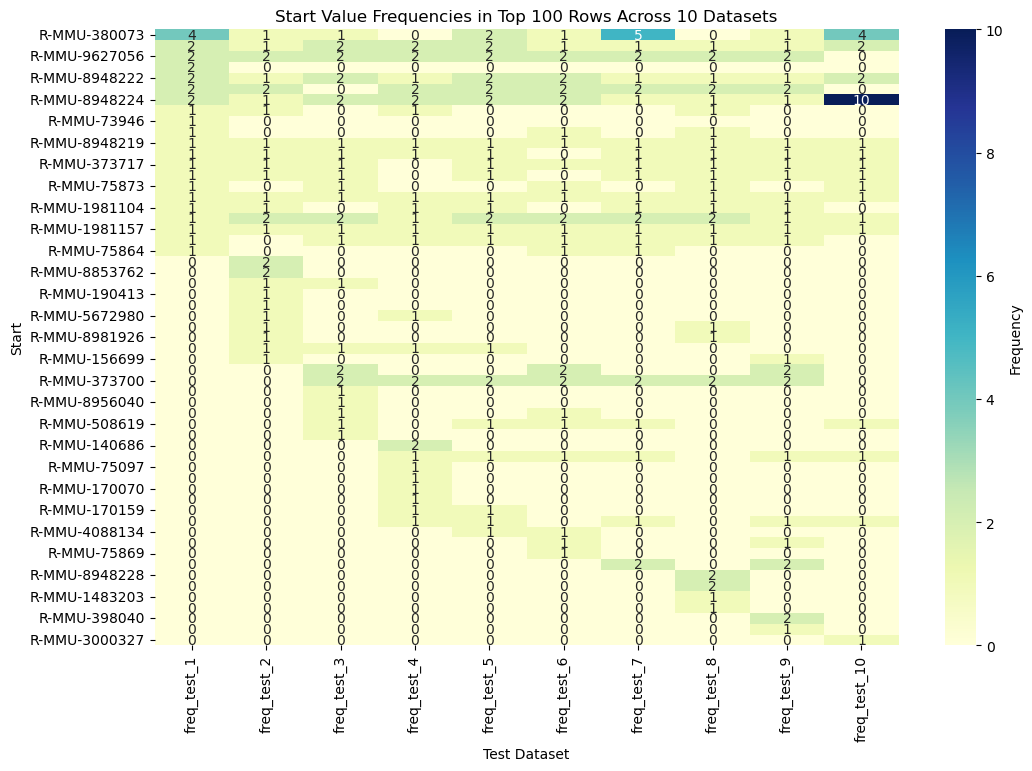

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_template = '/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_10{}.csv'

data_frames = []

for i in range(10):
    file_path = file_template.format(i)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, header=0, sep="\t")
        data_frames.append(df)
    else:
        print(f"File not found: {file_path}")

start_counts = pd.DataFrame()

for i, df in enumerate(data_frames):
    df_top100 = df.head(30)
    start_freq = df_top100['start'].value_counts().reset_index()
    start_freq.columns = ['start', f'freq_test_{i+1}']
    if start_counts.empty:
        start_counts = start_freq
    else:
        start_counts = pd.merge(start_counts, start_freq, on='start', how='outer')

start_counts.fillna(0, inplace=True)

start_counts.set_index('start', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(start_counts, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Frequency'}, linewidths=0)
plt.title('Start Value Frequencies in Top 100 Rows Across 10 Datasets')
plt.ylabel('Start')
plt.xlabel('Test Dataset')
plt.show()
